<a href="https://colab.research.google.com/github/monicasjsu/Machine_Learning/blob/main/DecisionTreeClassifier_SheCodes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contributors

**Team SheCodes**

* Asha Balshiram Aher
* Sri Sruthi Chilukuri
* Swati Ganesh Narkhede
* Monica Dommaraju


# Data Story
The Goal of this assignement is to implement Decision tree classifier on the dataset and try to learn what is classification telling about the data(which has been covered in conclusion section).
The dataset that we are working on consists of a subset of employee details such as Postion, Group, Salary, Satisfaction Level, Gender etc. and the class label to identify if the employee left the organization or still with the organization. This dataset consists of 1470 rows and 35 features. The ultimate goal of this project is to predict the employee attrition given the employee details. For this assignment we are going to analyze the few features and apply Decision Tree analysis.

# Data Set and Data Selection
**Dataset:**

We found the following dataset from Kaggle postled by IBM HR Analytics department.

https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset
https://drive.google.com/open?id=1_DsgvxZcBkLEhy7rZVbOqLTbxt7S28hQHCTiPRc3eio

**Data Selection:** 

Data Selection The Dataset that we have chosen don't have any missing values. So we tried to search for other related datasets that are related to employee attrition, but all the datasets that we found don't have any missing values. So,we have chosen the IBM dataset as we are interested in finding insights about the attrition rate of Technology heavy company such as IBM.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # Import train_test_split function 
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Applying Decision Tree to Classify Attrition

In [ ]:
#import io
#df2 = pd.read_csv(io.BytesIO(uploaded['Employee-Attrition.csv']))


from google.colab import drive
drive.mount('/content/drive')
df2 = pd.read_csv("/content/drive/Shared drives/SheCodes/HR_Employee_Attrition.csv",sep=',')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive



1.   Lets have some insights of all features and data associated with it.



In [ ]:
df2.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000



2.   to check if there are any columns with singular values



In [ ]:
single_cols = []
for col in df2.columns:
    if len(df2[col].unique())==1:
        print(col)
        single_cols.append(col)

EmployeeCount
Over18
StandardHours



3.  removing colums whith Singular values.




In [ ]:
# Now lets drop the columns
df2.drop(single_cols, axis=1, inplace=True)
# Now lets check the cols
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
MonthlyRate           

6. **Change the Object type to categorical types, so that they can be converted to Integer using cat.codes**




In [ ]:
for col in ['BusinessTravel', 'Gender', 'JobRole', 'OverTime', 'EducationField', 'Department', 'MaritalStatus','Attrition']:
    df2[col] = df2[col].astype('category')
    df2[col] = df2[col].cat.codes

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null int8
BusinessTravel              1470 non-null int8
DailyRate                   1470 non-null int64
Department                  1470 non-null int8
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null int8
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null int8
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null int8
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null int8
MonthlyIncome               1470 non-null int64
MonthlyRate                 1470 non



7. Identified Y and Building decision tree on X.

      X = all features which we got in data preparation excluding Attrition 
      Y = Attrition




In [ ]:
feature_cols = ['Age','BusinessTravel','DailyRate','Department','DistanceFromHome','Education','EducationField','EmployeeNumber','EnvironmentSatisfaction','Gender','HourlyRate','JobInvolvement','JobLevel','JobRole','JobSatisfaction','MaritalStatus','MonthlyIncome','MonthlyRate','NumCompaniesWorked','OverTime','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager' ]
X = df2[feature_cols] # Features
y = df2.Attrition # Target variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# To Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7891156462585034



**8. Visualization of Decision tree**




/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


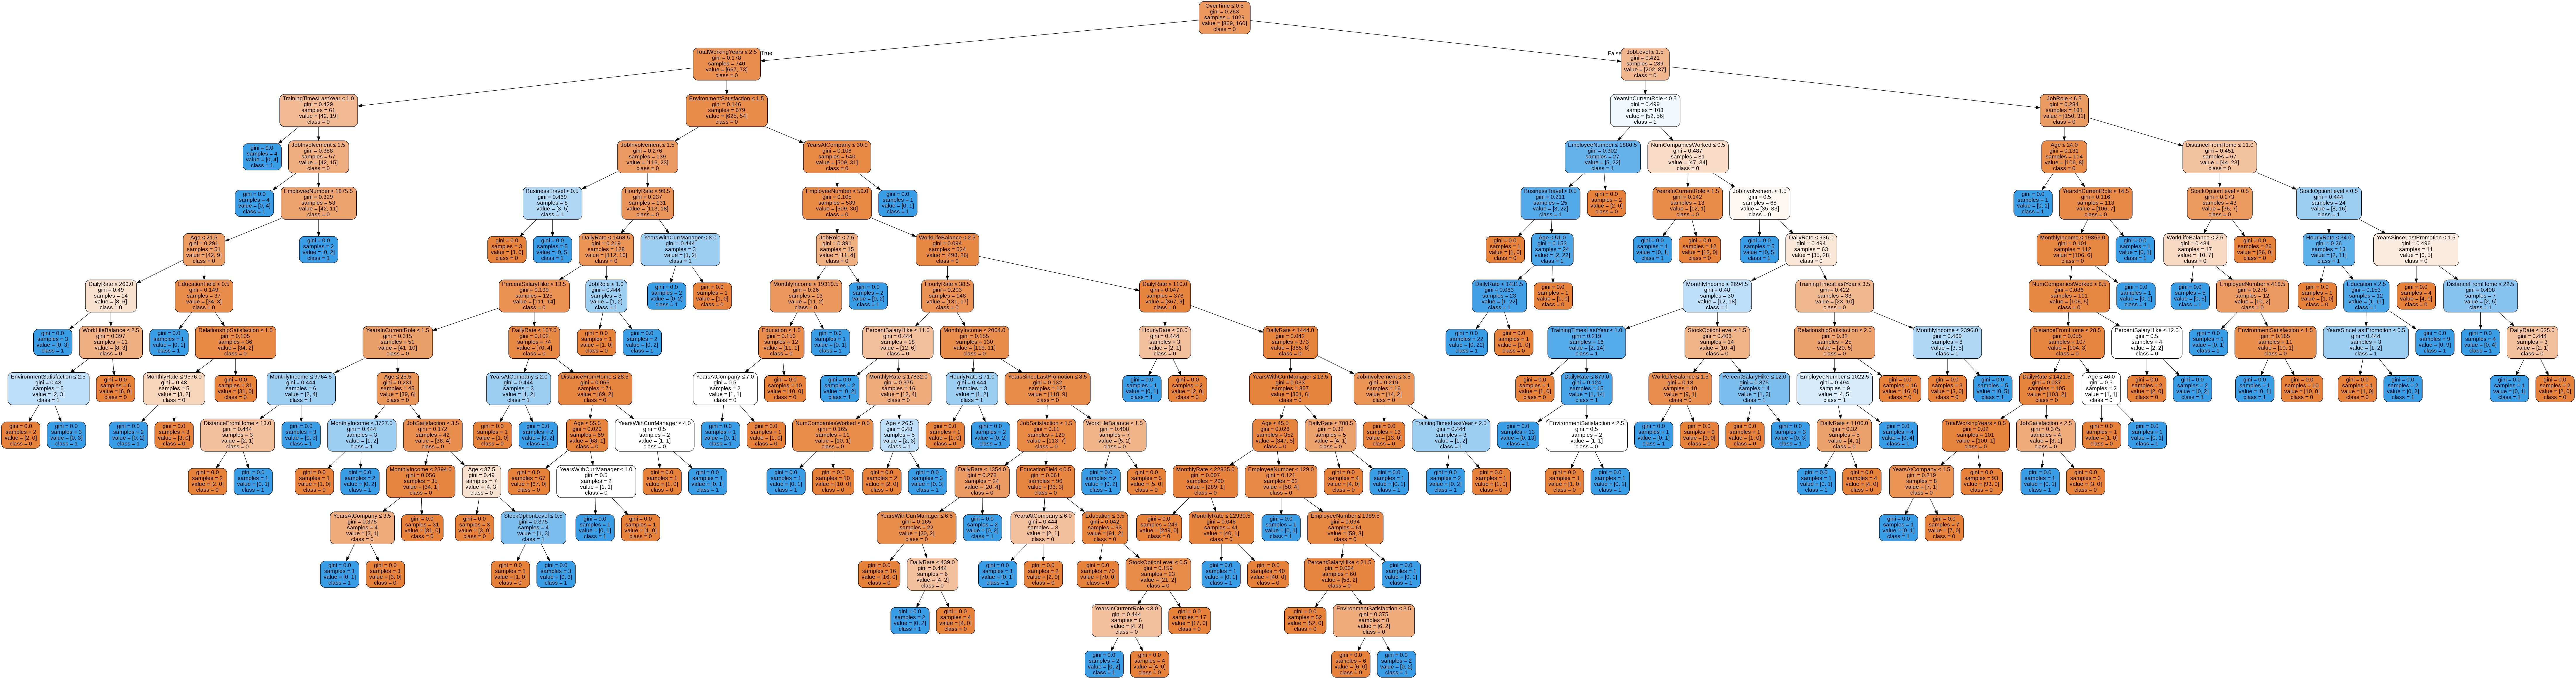

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names= feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())


# Conclusion

- Using Decision tree classifer we got the accuracy of model as 80%, We used Attrition column as a Target value, This is the column we are trying to predict.

- Decision trees classify instances by sorting them based on feature values. as you we see in above tree visualization,every feature has been sorted based on feature values. This gives clear picture about which feature impacts the target(Attrition) more.

- The basic algorithm for decision tree induction is a
greedy algorithm that constructs decision trees in a topdown recursive divide-and-conquer manner. 

- Decision tree classfier approach uses greedy
strategies and it is usually used because they are efficient and
easy to implement.